# **1. Dataset collection and description**

In [ ]:
from IPython.display import HTML

print("Dataset description = ", end='')
HTML('<a href="https://docs.google.com/document/d/1xvo6kN5Q4QG-ezZKrNwg2YMD6S_fwlmz/edit">Click Me</a>')

Dataset description = 

# **2. Dataset details**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [ ]:
path = r"/content/drive/MyDrive/data.xlsx"
df = pd.read_excel(path)

In [ ]:
print(f"Shape of actual data = {df.shape}")
print()

df.shape
df.head()

In [ ]:
df.columns

In [ ]:
print(df.info())

In [ ]:
df['Unnamed: 0'].value_counts()

In [ ]:
# 1st column contains only single value so we can drop it
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

In [ ]:
# check null values
null_counts = df.isnull().sum()
print(null_counts)

In [ ]:
#check duplicate val
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
df.dtypes

In [ ]:
def handle_present_date(date_str):
    if date_str == "present":
        return pd.to_datetime("today")
    else:
        return pd.to_datetime(date_str)
df['DOL'].replace('present','2015-12-31', inplace = True)
df["DOL"] = df["DOL"].apply(handle_present_date)
df['DOL'] = pd.to_datetime(df['DOL'])
df.head()

In [ ]:
# Getting the number of date of leaving values that were earlier than the Date of Joining (DOJ) values...
dol_doj_dates = df[(df['DOL'] < df['DOJ'])].shape[0]
print(f'Therefore there were {dol_doj_dates} DOL values that were earlier than DOJ.')

Therefore there were 40 DOL values that were earlier than DOJ.


In [ ]:
# Here we say that 40 out of 3998 were left the company before joining the company. So these values might to be typos, then we drop those rows.

df = df.drop(df[~(df['DOL'] > df['DOJ'])].index)
df.shape

(3943, 38)

In [ ]:
# Some negative values were observed in some of the columns, let's count how many times they appear for each of these columns

columns_to_check = ['Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience']

negative_counts = {col: (df[col] < 0).sum() for col in columns_to_check}

for col, count in negative_counts.items():
    print("Num of -ve values in '{}': {}".format(col, count))

In [ ]:
# replacing negative values with 0
# recall the list - columns_to_check

#to replace neative values with 0 in these columns

for col in columns_to_check:
    df.loc[df[col] < 0, col] = 0

# to do the count once more
negative_counts = {col: (df[col] < 0).sum() for col in columns_to_check}

for col, count in negative_counts.items():
    print("Num of -ve values in '{}': {}".format(col, count))


Num of -ve values in 'Domain': 0
Num of -ve values in 'ComputerProgramming': 0
Num of -ve values in 'ElectronicsAndSemicon': 0
Num of -ve values in 'ComputerScience': 0
Num of -ve values in 'MechanicalEngg': 0
Num of -ve values in 'ElectricalEngg': 0
Num of -ve values in 'TelecomEngg': 0
Num of -ve values in 'CivilEngg': 0
Num of -ve values in 'conscientiousness': 0
Num of -ve values in 'agreeableness': 0
Num of -ve values in 'extraversion': 0
Num of -ve values in 'nueroticism': 0
Num of -ve values in 'openess_to_experience': 0


In [ ]:
# converting from int to object

df['CollegeTier'] = df['CollegeTier'].astype(object)
df['CollegeCityTier'] = df['CollegeCityTier'].astype(object)

df.dtypes

,0
ID,int64
Salary,int64
DOJ,datetime64[ns]
DOL,datetime64[ns]
Designation,object
JobCity,object
Gender,object
DOB,datetime64[ns]
10percentage,float64
10board,object


# **NOTE : target = Salary**

# ***1. Univariate Analysis***

In [ ]:
# first divide the dataframe into two - one for numerical and the other for categorical variables

cat_df = df.select_dtypes(include = ['object'])
numerical_columns = df.select_dtypes(include = ['int64', 'float64'])

print((cat_df.shape))
print((numerical_columns.shape))

(3943, 10)
(3943, 25)


# Probability & frequency distribution of each numerical column

Analysis for Salary:
Mean: 308256.15
Median: 300000.00
Mode: 300000.00
Standard Deviation: 211763.10
Skewness: 6.53
Kurtosis: 83.08
Number of outliers: 104
Outlier range: (-108750.00, 661250.00)



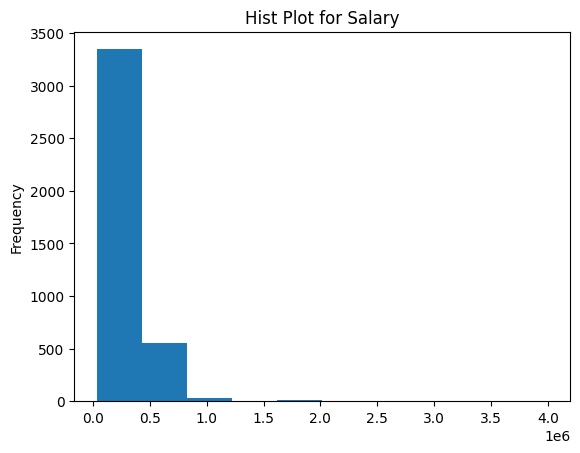

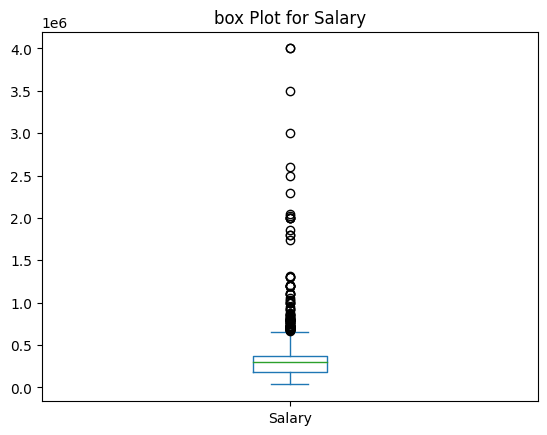

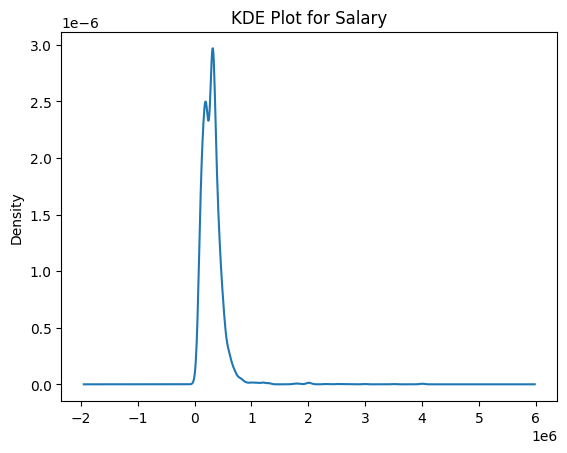


Analysis for 10percentage:
Mean: 77.95
Median: 79.20
Mode: 78.00
Standard Deviation: 9.84
Skewness: -0.60
Kurtosis: -0.09
Number of outliers: 30
Outlier range: (50.91, 106.61)



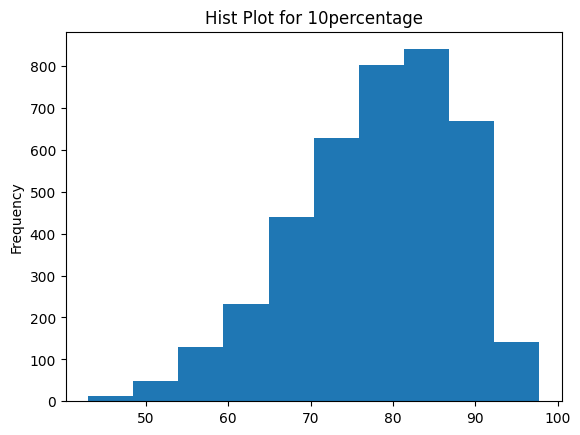

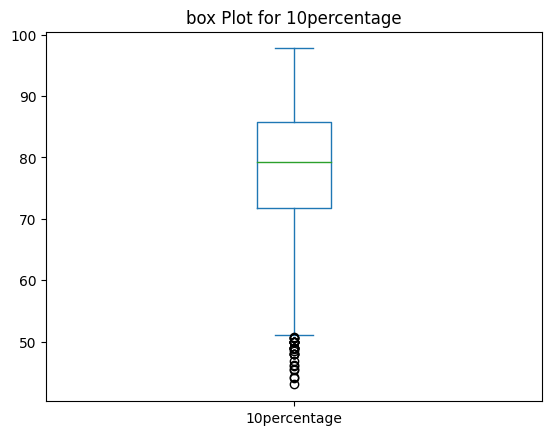

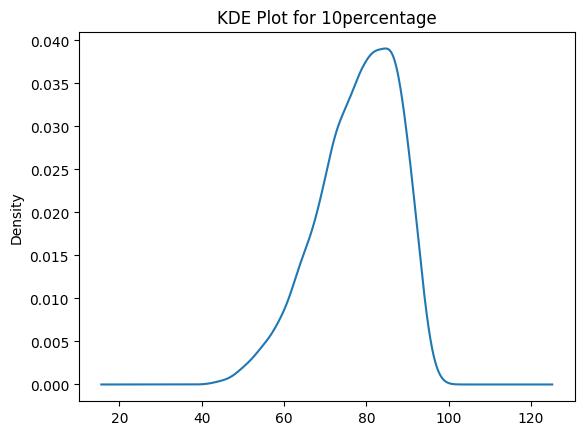


Analysis for 12graduation:
Mean: 2008.07
Median: 2008.00
Mode: 2009.00
Standard Deviation: 1.66
Skewness: -0.96
Kurtosis: 1.93
Number of outliers: 45
Outlier range: (2004.00, 2012.00)



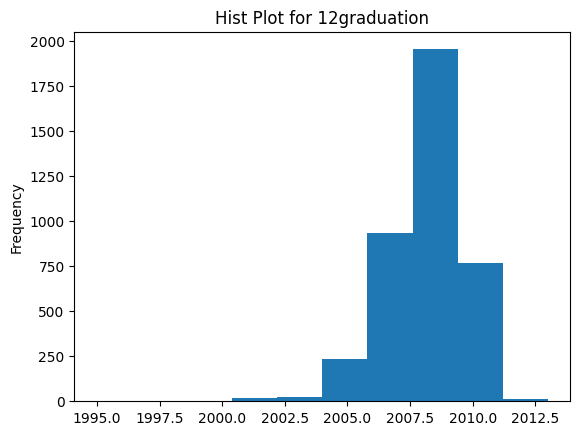

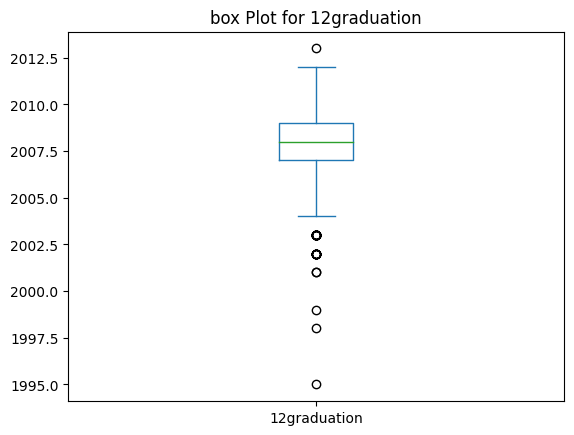

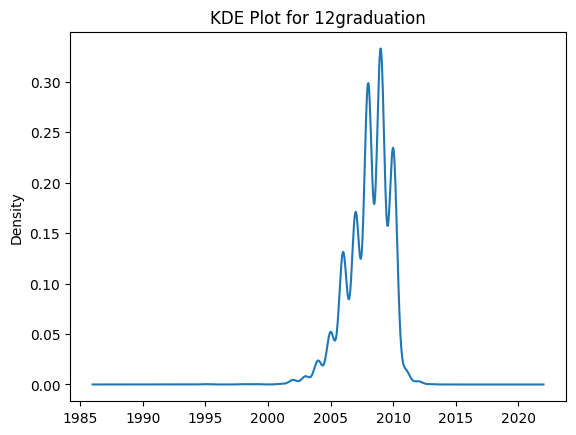


Analysis for 12percentage:
Mean: 74.46
Median: 74.40
Mode: 70.00
Standard Deviation: 11.00
Skewness: -0.04
Kurtosis: -0.62
Number of outliers: 1
Outlier range: (41.13, 107.45)



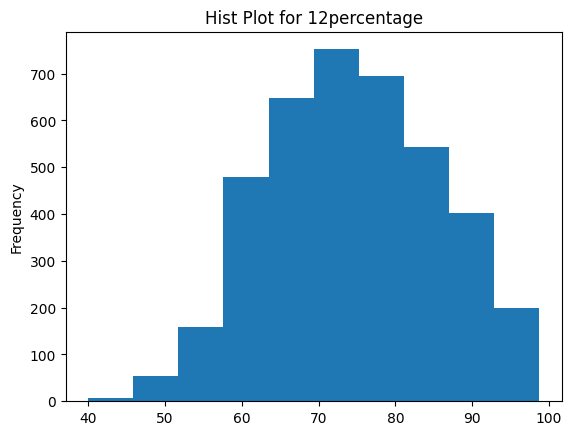

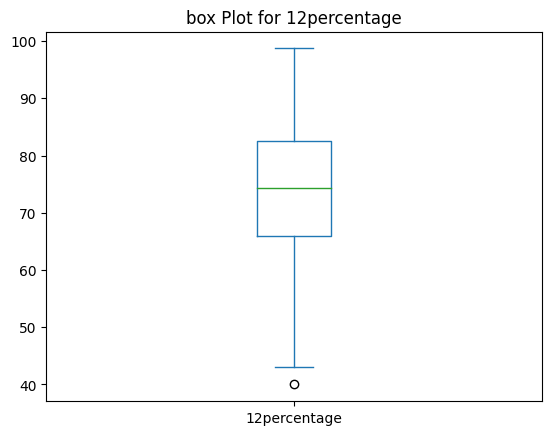

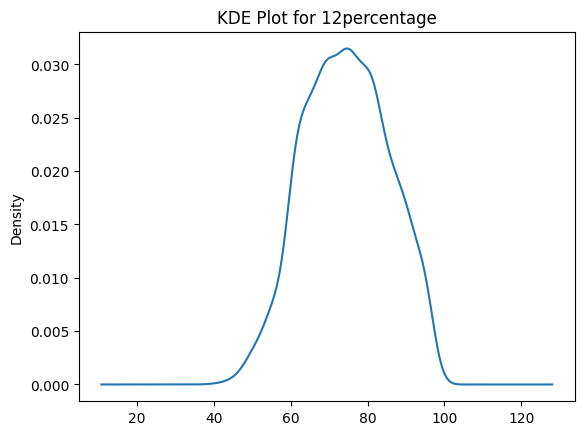


Analysis for CollegeID:
Mean: 5146.10
Median: 3879.00
Mode: 272.00
Standard Deviation: 4794.13
Skewness: 0.65
Kurtosis: -0.76
Number of outliers: 0
Outlier range: (-11981.50, 21286.50)



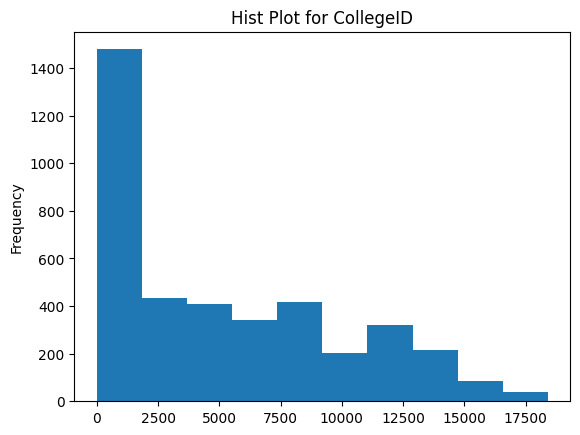

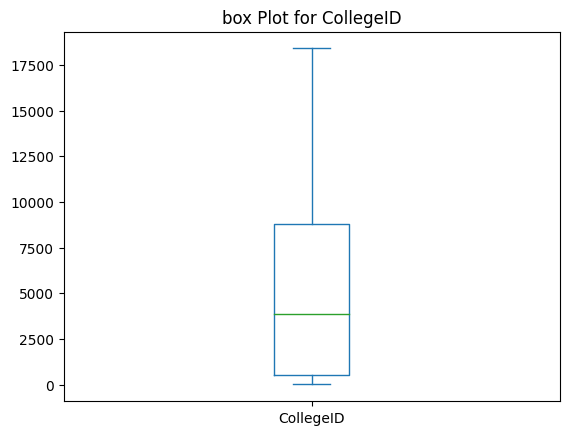

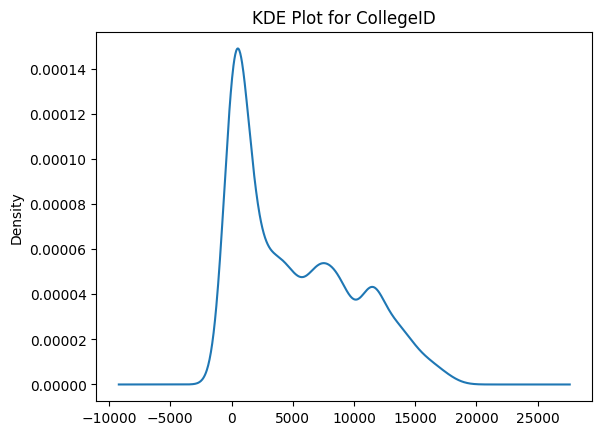


Analysis for collegeGPA:
Mean: 71.49
Median: 71.70
Mode: 70.00
Standard Deviation: 8.19
Skewness: -1.26
Kurtosis: 10.27
Number of outliers: 38
Outlier range: (51.40, 91.40)



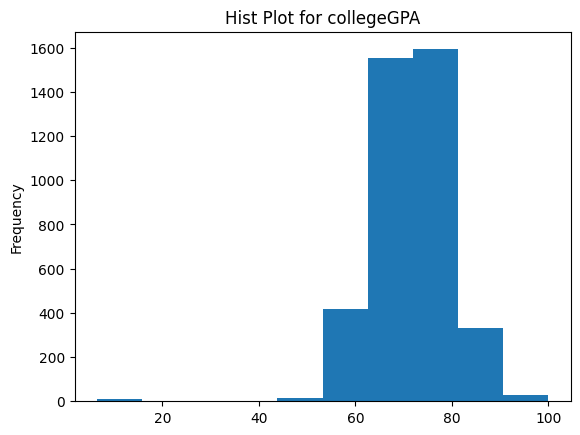

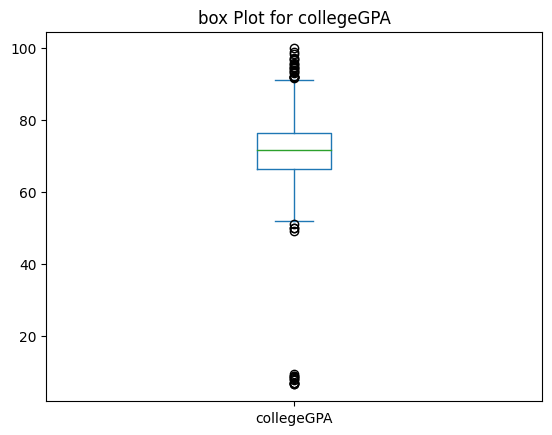

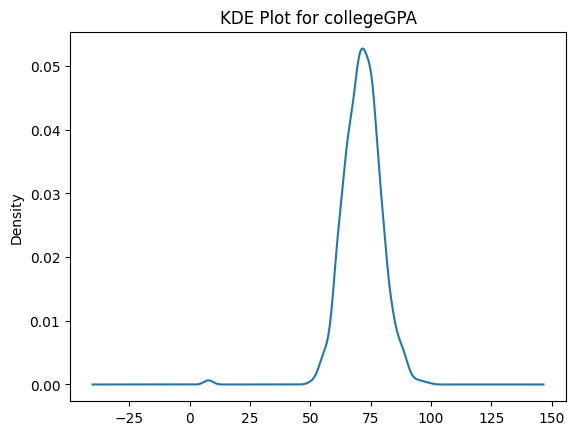


Analysis for CollegeCityID:
Mean: 5146.10
Median: 3879.00
Mode: 272.00
Standard Deviation: 4794.13
Skewness: 0.65
Kurtosis: -0.76
Number of outliers: 0
Outlier range: (-11981.50, 21286.50)



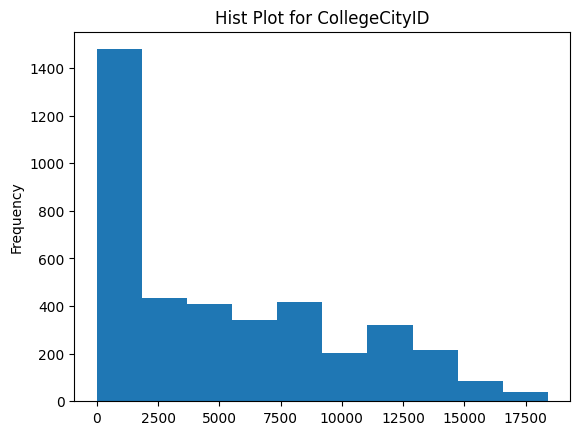

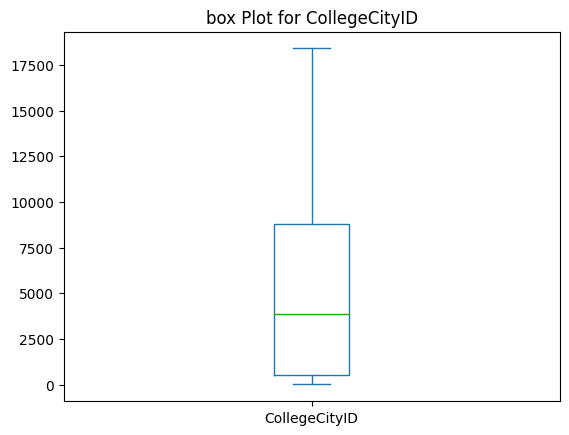

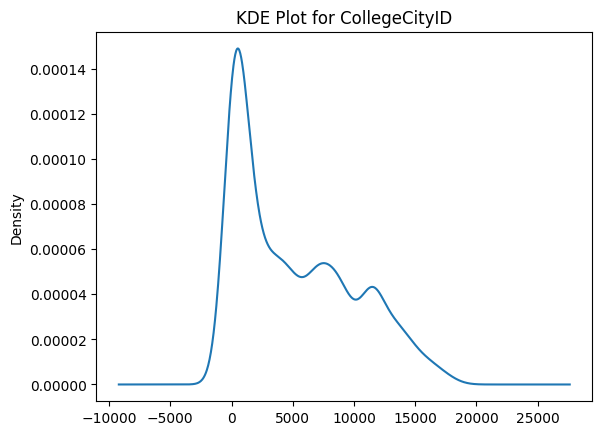


Analysis for GraduationYear:
Mean: 2012.09
Median: 2013.00
Mode: 2013.00
Standard Deviation: 32.08
Skewness: -62.63
Kurtosis: 3929.71
Number of outliers: 2
Outlier range: (2009.00, 2017.00)



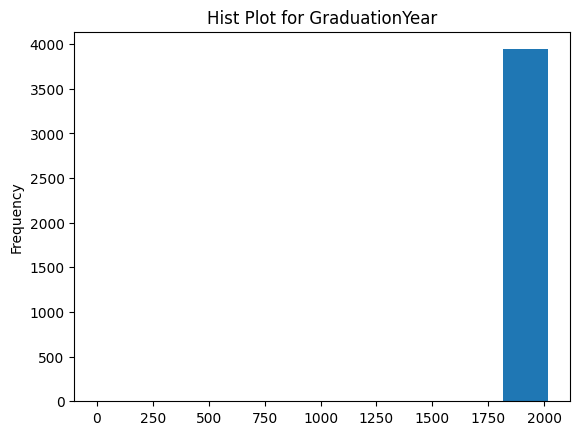

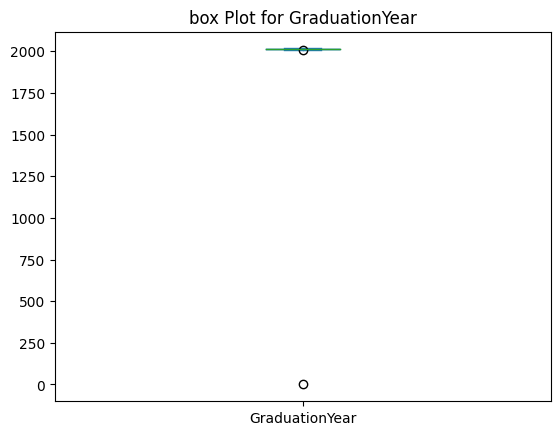

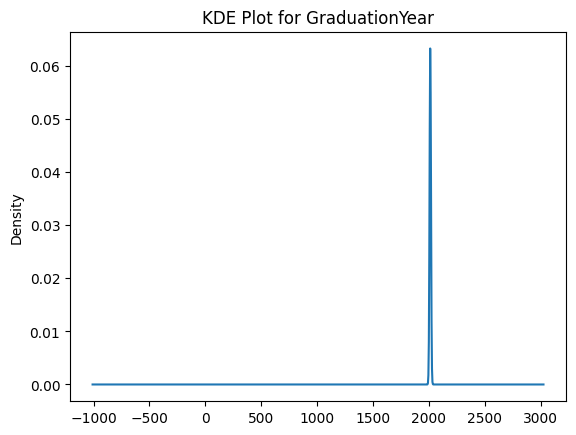


Analysis for English:
Mean: 501.79
Median: 500.00
Mode: 475.00
Standard Deviation: 104.80
Skewness: 0.20
Kurtosis: -0.25
Number of outliers: 15
Outlier range: (207.50, 787.50)



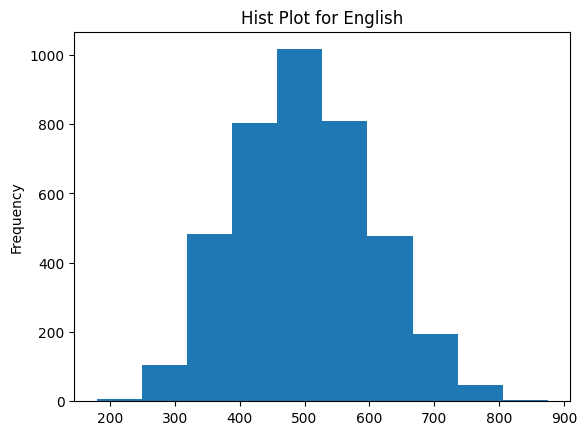

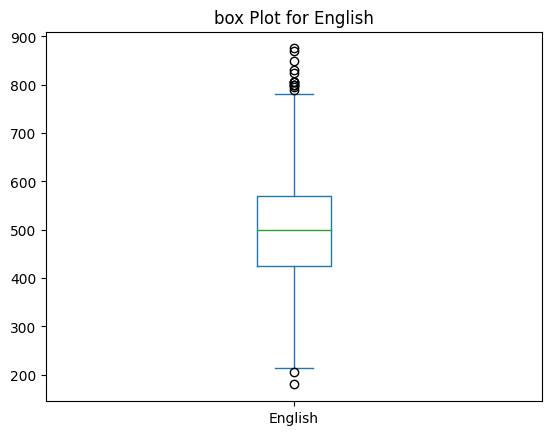

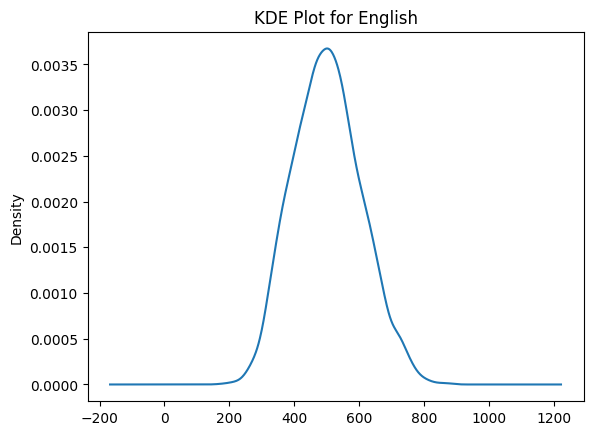


Analysis for Logical:
Mean: 501.61
Median: 505.00
Mode: 495.00
Standard Deviation: 86.65
Skewness: -0.22
Kurtosis: -0.23
Number of outliers: 18
Outlier range: (265.00, 745.00)



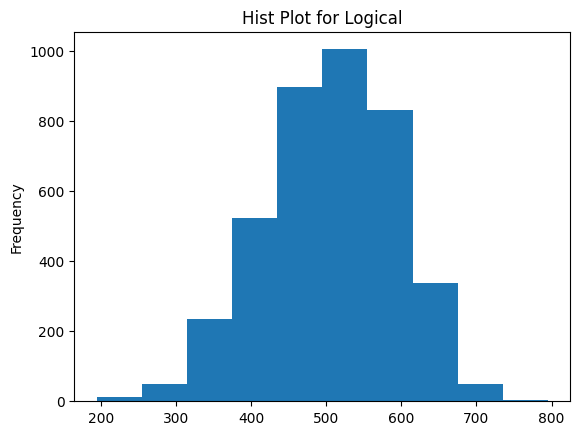

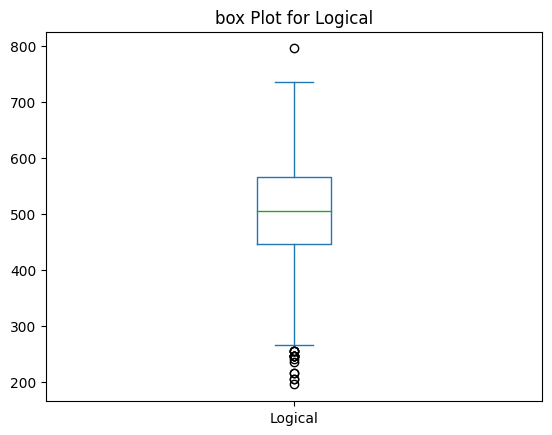

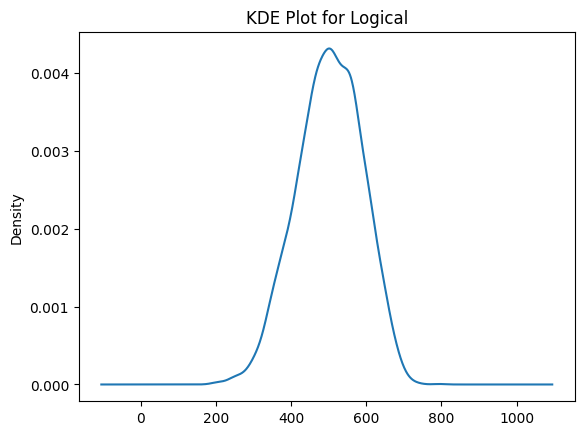


Analysis for Quant:
Mean: 513.31
Median: 515.00
Mode: 605.00
Standard Deviation: 122.21
Skewness: -0.02
Kurtosis: -0.09
Number of outliers: 25
Outlier range: (182.50, 842.50)



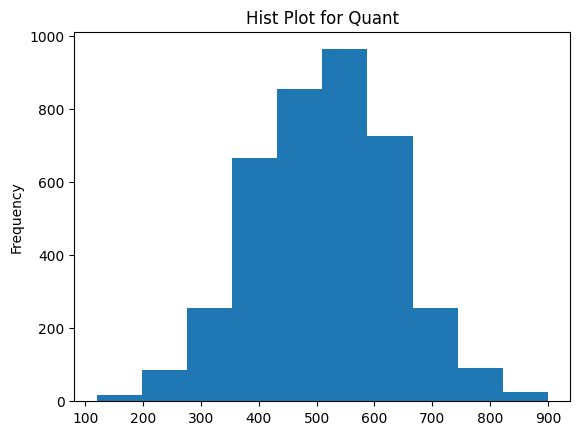

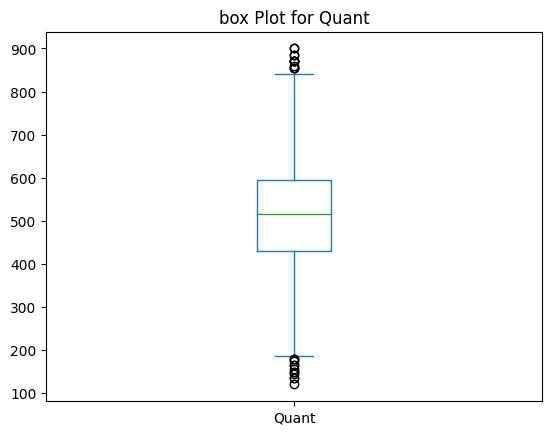

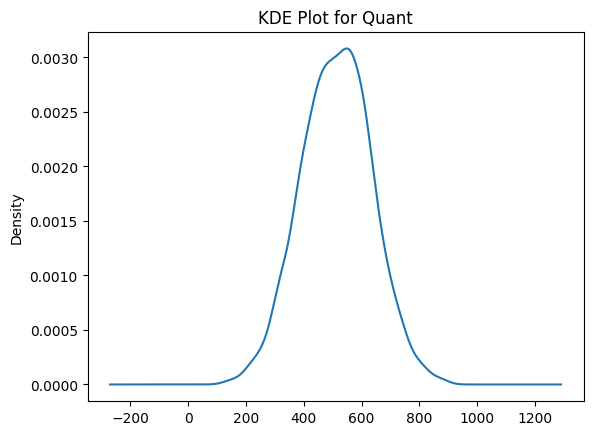


Analysis for Domain:
Mean: 0.57
Median: 0.62
Mode: 0.00
Standard Deviation: 0.30
Skewness: -0.40
Kurtosis: -1.00
Number of outliers: 0
Outlier range: (-0.41, 1.59)



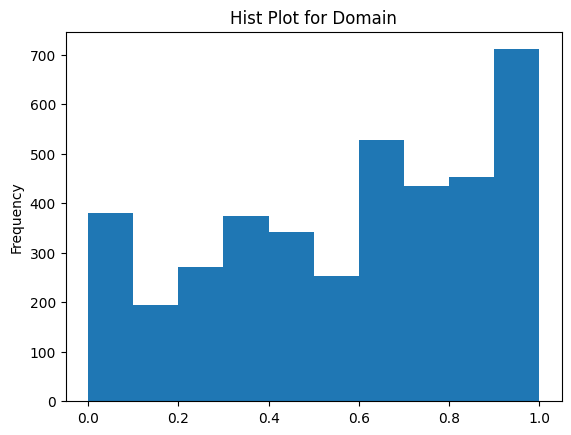

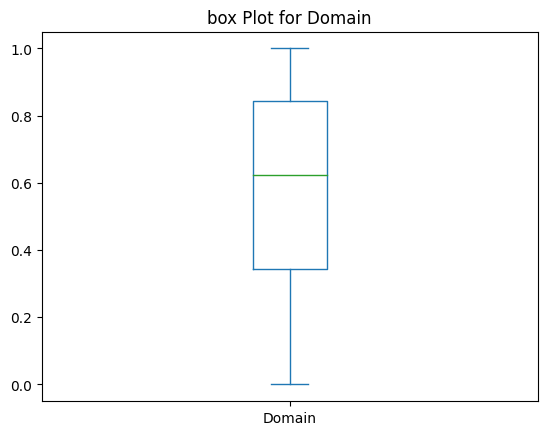

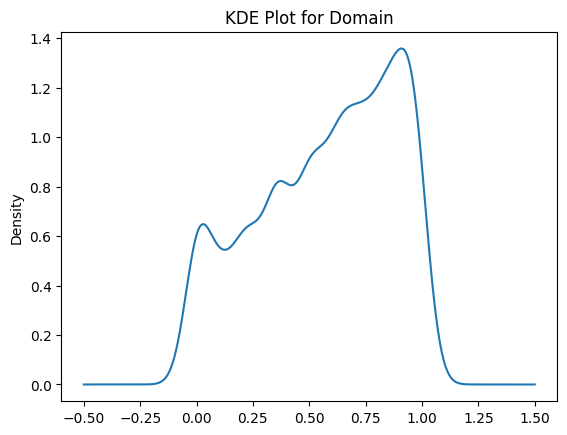


Analysis for ComputerProgramming:
Mean: 353.09
Median: 415.00
Mode: 0.00
Standard Deviation: 205.54
Skewness: -0.77
Kurtosis: -0.68
Number of outliers: 2
Outlier range: (-5.00, 795.00)



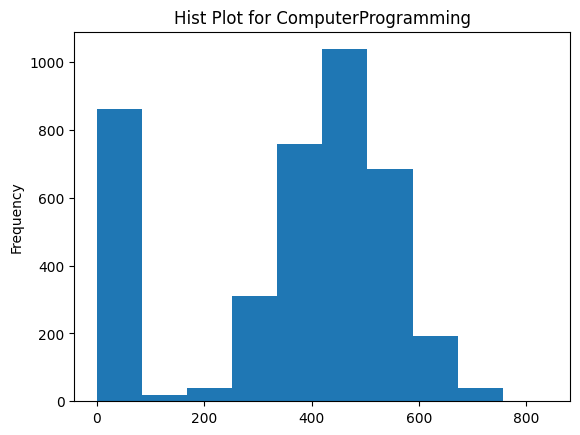

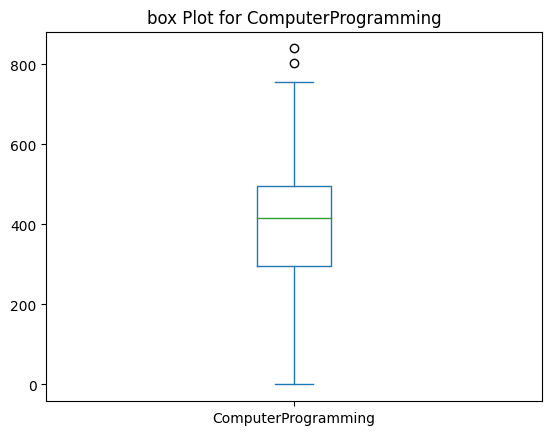

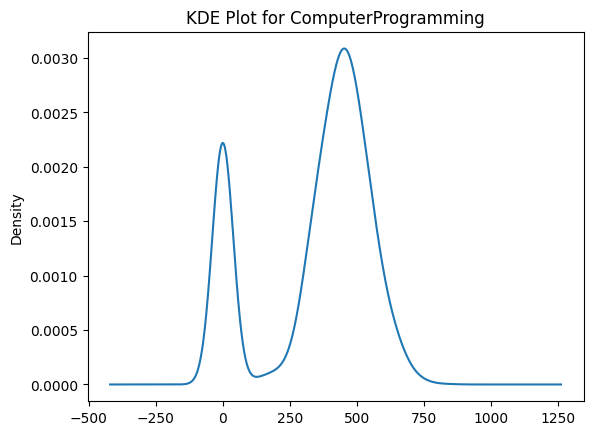


Analysis for ElectronicsAndSemicon:
Mean: 96.09
Median: 0.00
Mode: 0.00
Standard Deviation: 157.95
Skewness: 1.20
Kurtosis: -0.20
Number of outliers: 2
Outlier range: (-349.50, 582.50)



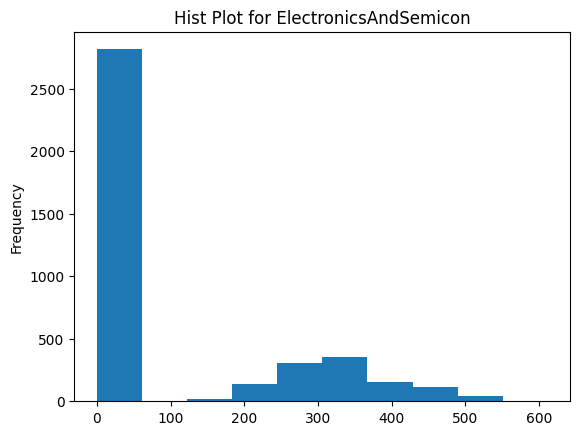

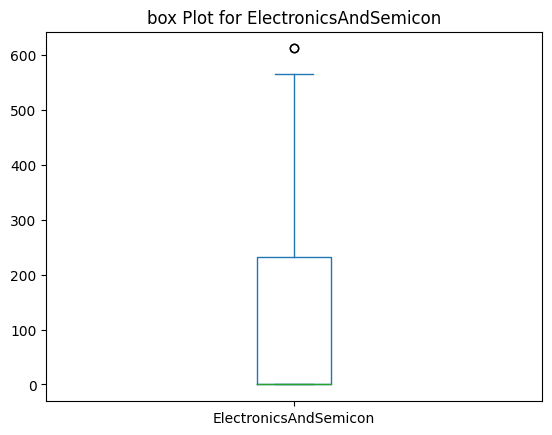

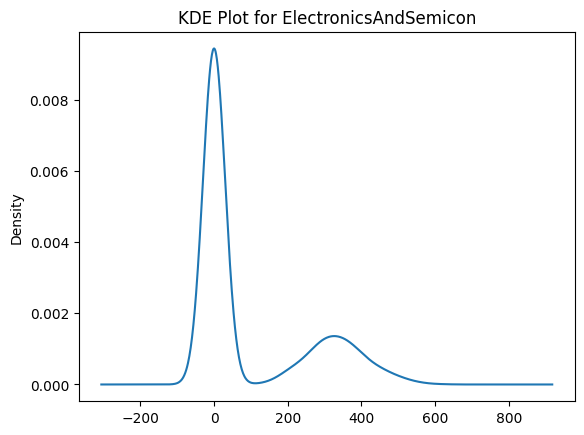


Analysis for ComputerScience:
Mean: 90.86
Median: 0.00
Mode: 0.00
Standard Deviation: 174.45
Skewness: 1.54
Kurtosis: 0.74
Number of outliers: 883
Outlier range: (0.00, 0.00)



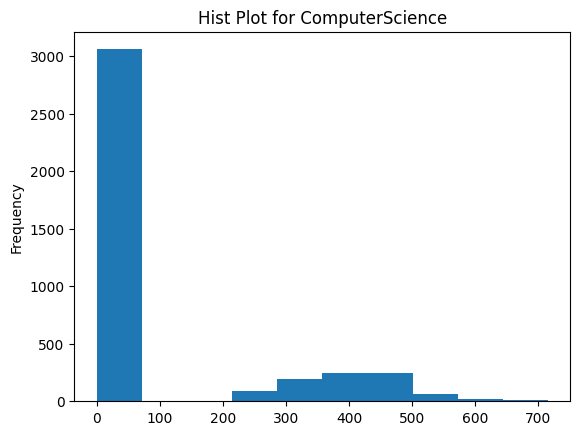

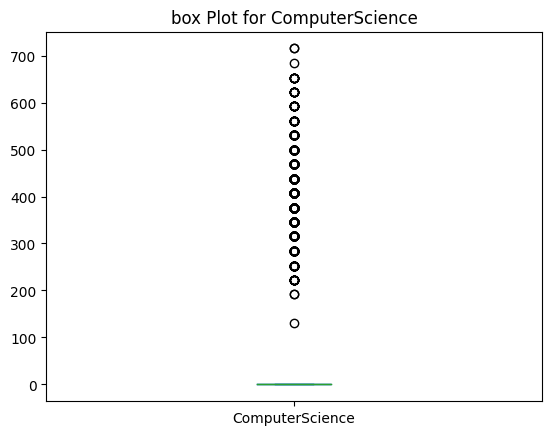

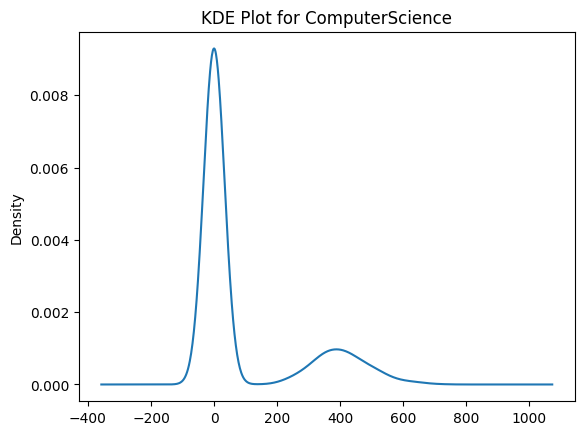


Analysis for MechanicalEngg:
Mean: 24.25
Median: 0.00
Mode: 0.00
Standard Deviation: 98.53
Skewness: 4.00
Kurtosis: 14.76
Number of outliers: 235
Outlier range: (0.00, 0.00)



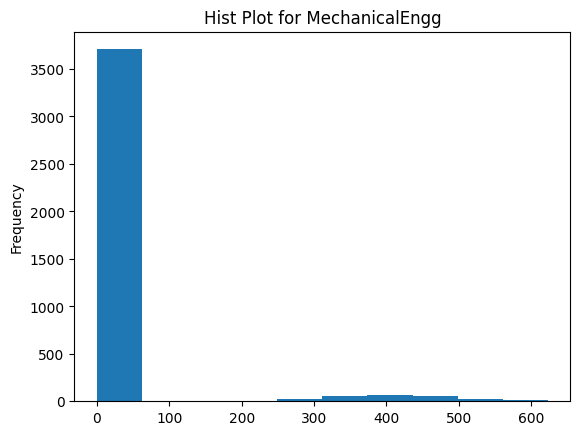

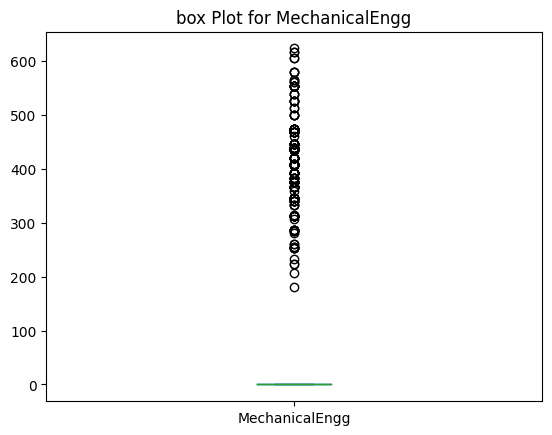

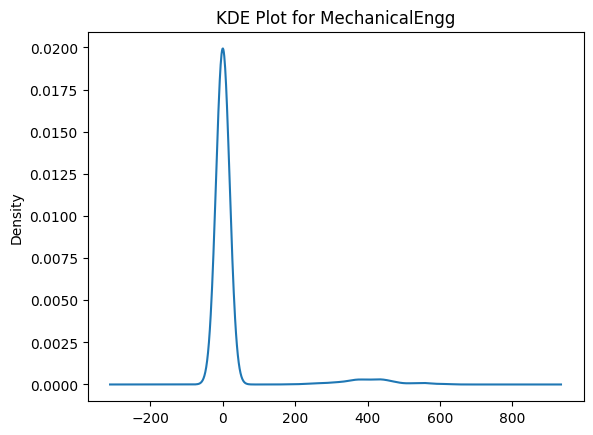


Analysis for ElectricalEngg:
Mean: 16.86
Median: 0.00
Mode: 0.00
Standard Deviation: 85.92
Skewness: 5.16
Kurtosis: 26.01
Number of outliers: 154
Outlier range: (0.00, 0.00)



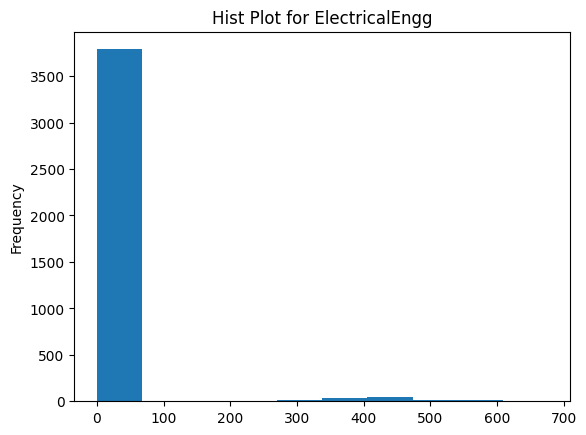

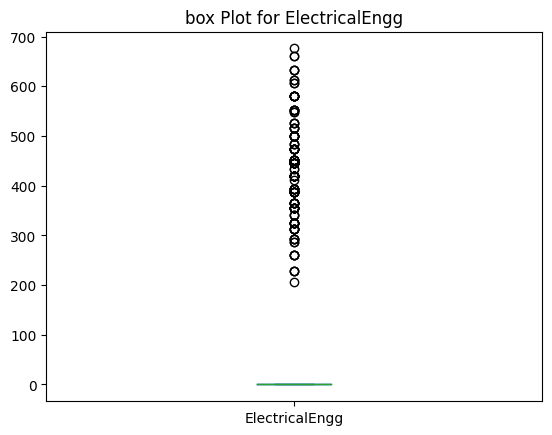

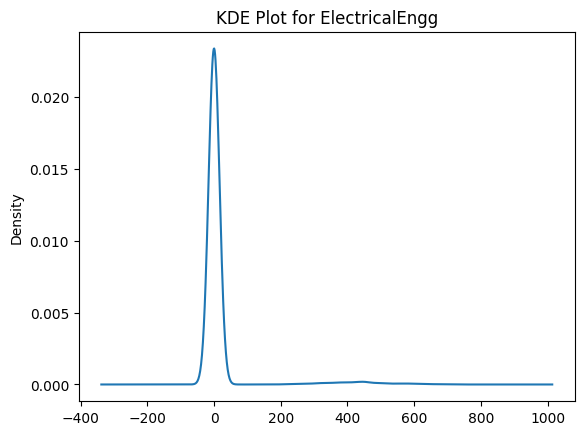


Analysis for TelecomEngg:
Mean: 33.04
Median: 0.00
Mode: 0.00
Standard Deviation: 104.98
Skewness: 3.03
Kurtosis: 7.72
Number of outliers: 372
Outlier range: (0.00, 0.00)



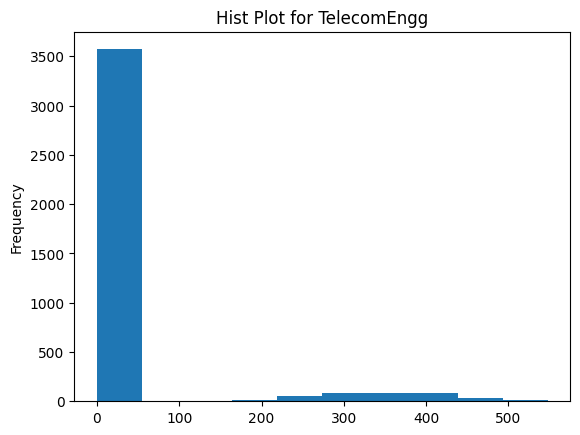

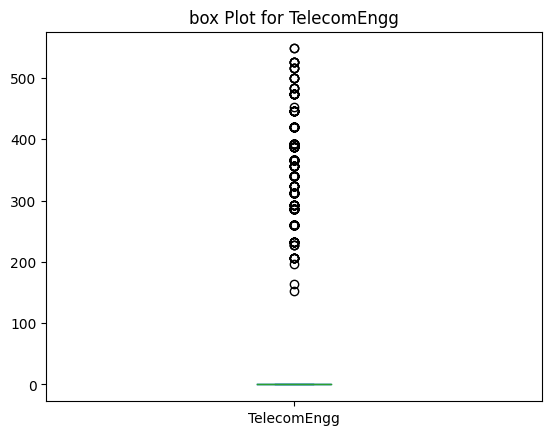

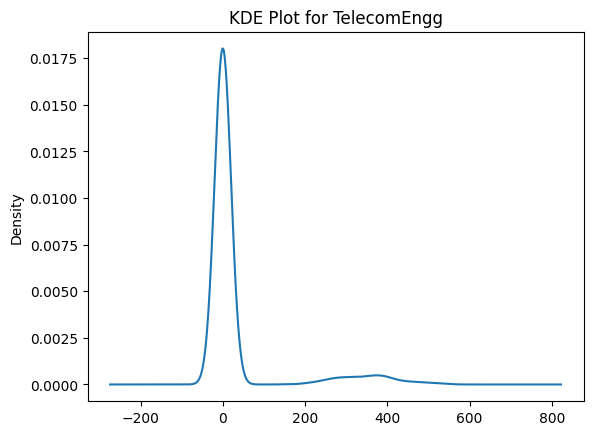


Analysis for CivilEngg:
Mean: 3.72
Median: 0.00
Mode: 0.00
Standard Deviation: 36.81
Skewness: 10.25
Kurtosis: 107.58
Number of outliers: 42
Outlier range: (0.00, 0.00)



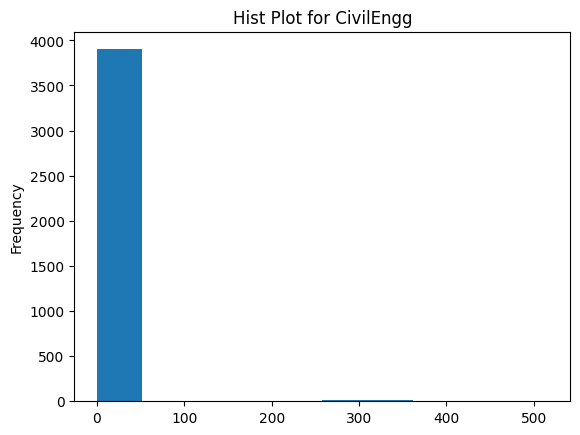

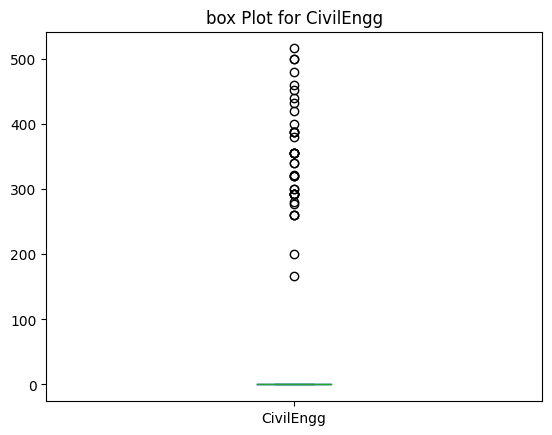

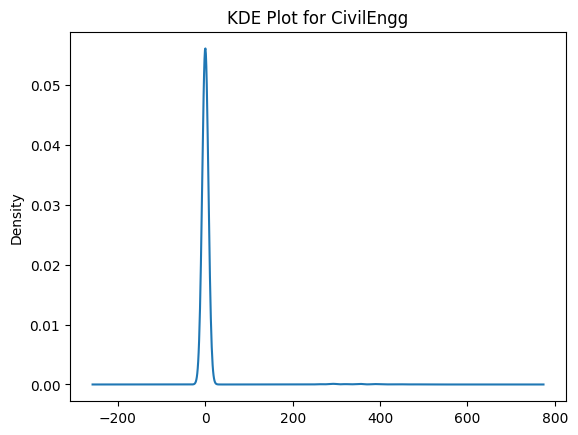


Analysis for conscientiousness:
Mean: 0.39
Median: 0.05
Mode: 0.00
Standard Deviation: 0.52
Skewness: 1.16
Kurtosis: 0.19
Number of outliers: 53
Outlier range: (-1.05, 1.76)



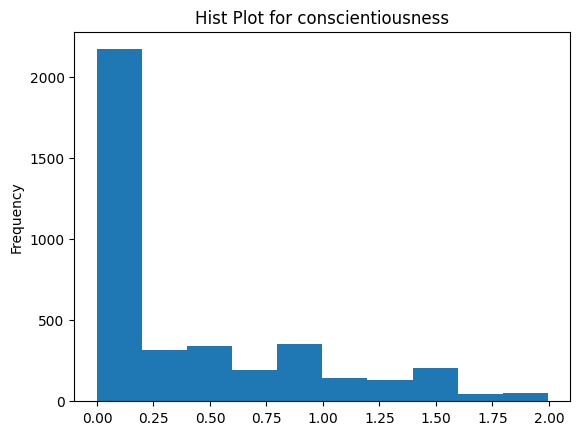

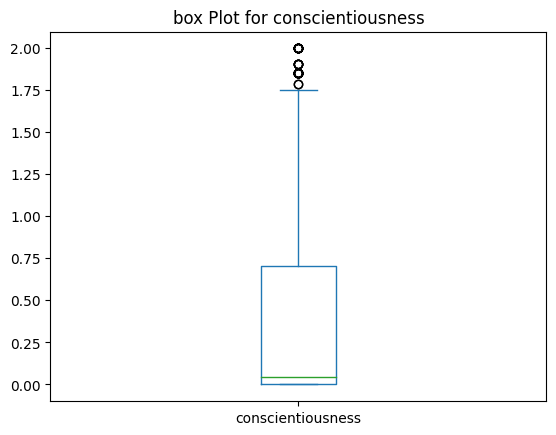

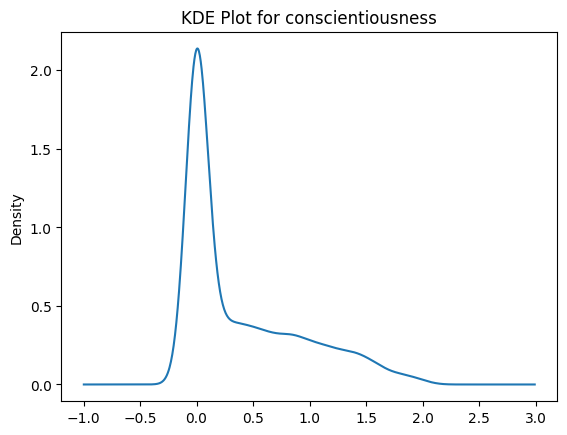


Analysis for agreeableness:
Mean: 0.44
Median: 0.21
Mode: 0.00
Standard Deviation: 0.50
Skewness: 0.88
Kurtosis: -0.37
Number of outliers: 0
Outlier range: (-1.22, 2.03)



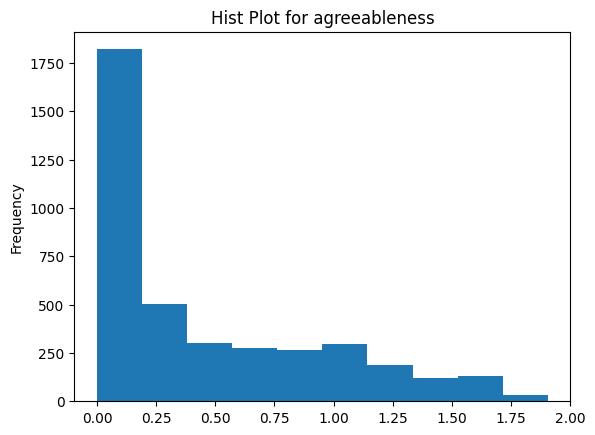

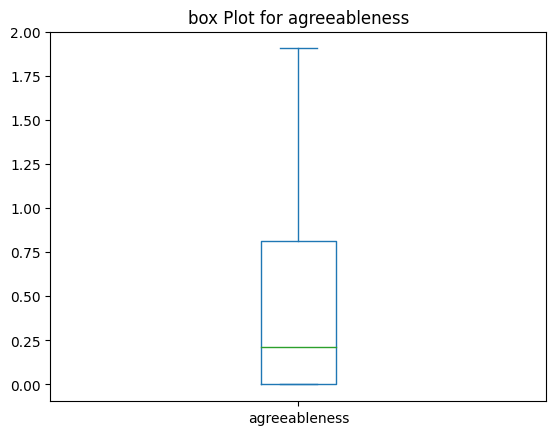

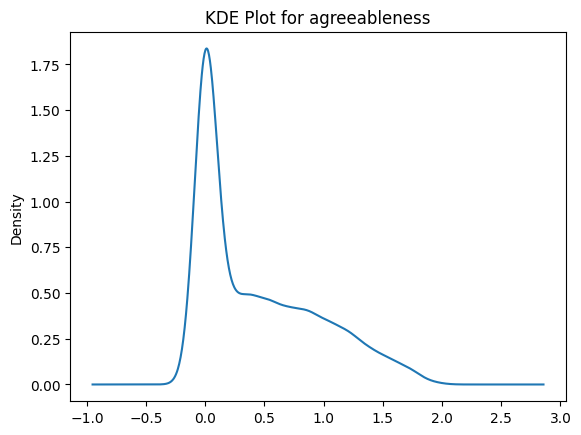


Analysis for extraversion:
Mean: 0.38
Median: 0.09
Mode: 0.00
Standard Deviation: 0.50
Skewness: 1.32
Kurtosis: 0.93
Number of outliers: 109
Outlier range: (-1.01, 1.68)



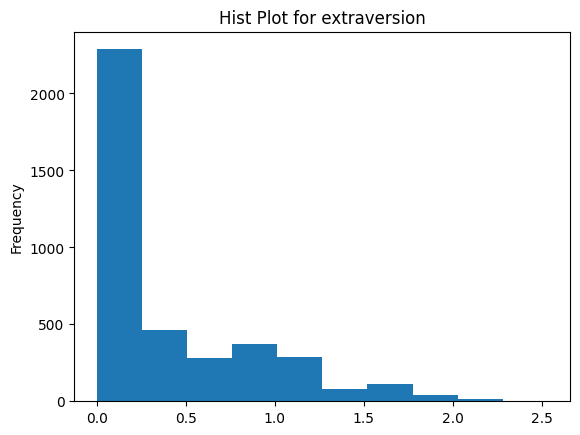

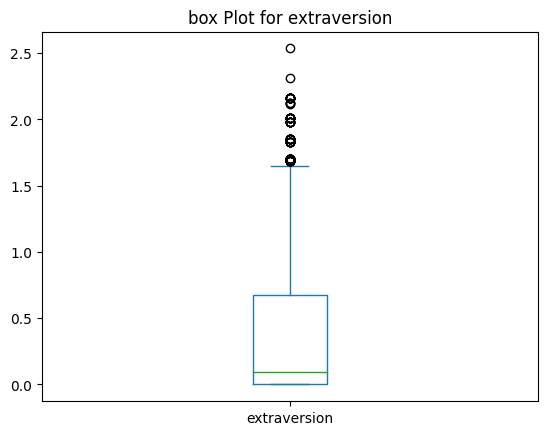

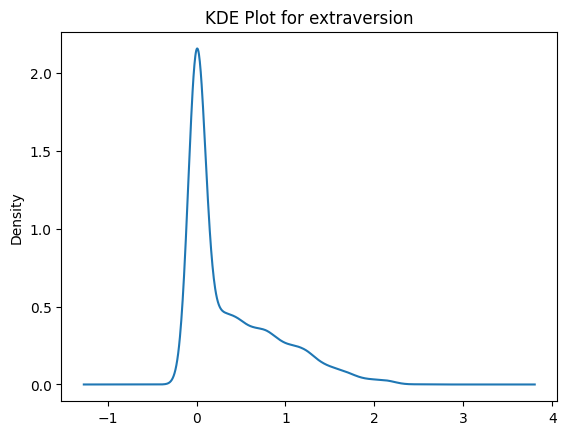


Analysis for nueroticism:
Mean: 0.33
Median: 0.00
Mode: 0.00
Standard Deviation: 0.55
Skewness: 1.91
Kurtosis: 3.45
Number of outliers: 306
Outlier range: (-0.79, 1.32)



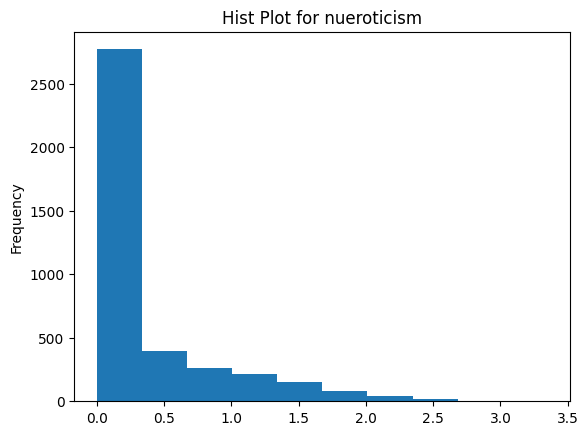

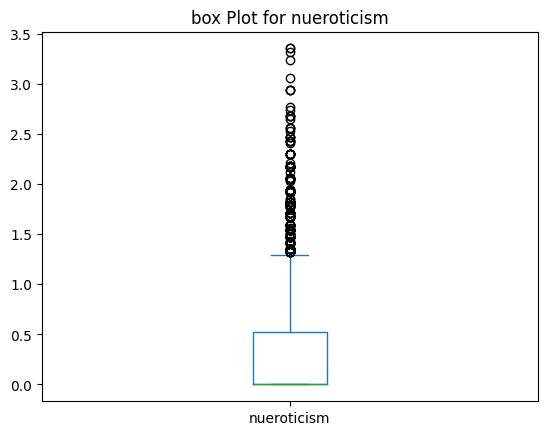

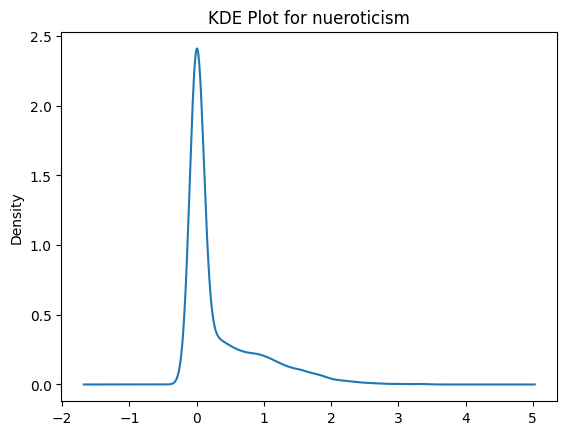


Analysis for openess_to_experience:
Mean: 0.30
Median: 0.00
Mode: 0.00
Standard Deviation: 0.42
Skewness: 1.31
Kurtosis: 0.70
Number of outliers: 136
Outlier range: (-0.75, 1.26)



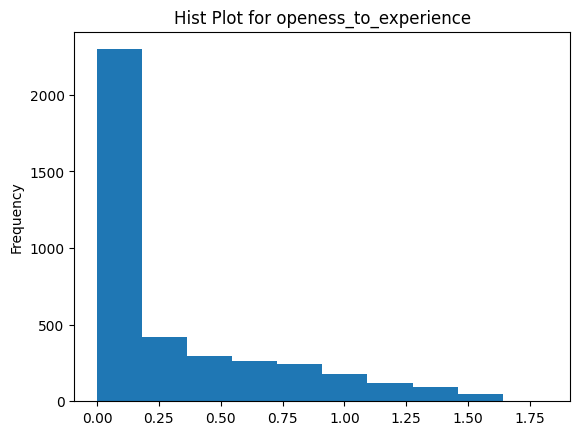

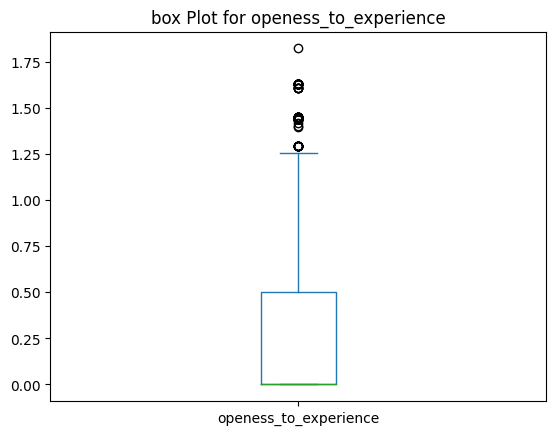

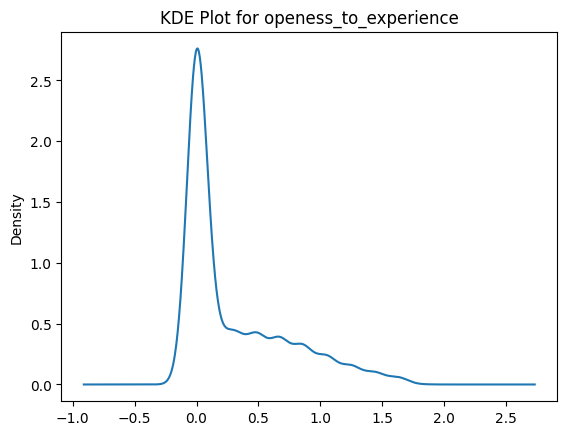

In [70]:
for column in numerical_columns:
  if column != 'ID':
      # Calculate statistics
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().values[0]
    std = df[column].std()
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()

    # Identify outliers using IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    print(f"Analysis for {column}:")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Mode: {mode:.2f}")
    print(f"Standard Deviation: {std:.2f}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier range: ({lower_bound:.2f}, {upper_bound:.2f})")
    print("\
")
    # Histogram
    plt.figure()
    df[column].plot(kind='hist')
    plt.title(f'Hist Plot for {column}')
    plt.show()
    print()
    # Box plot
    plt.figure()
    df[column].plot(kind='box')
    plt.title(f'box Plot for {column}')
    plt.show()
    print()
    # KDE plot
    plt.figure()
    df[column].plot(kind='kde')
    plt.title(f'KDE Plot for {column}')
    plt.show()
    print()

# Frequency distribution of each **categorical** column

In [ ]:
categorical_cols = df.copy()

for column in categorical_cols.columns:
    if categorical_cols[column].dtype == 'object':
        plt.figure(figsize=(18, 6))
        if len(categorical_cols[column].unique())>45:
            categorical_cols[column].value_counts()[:45].plot(kind='bar')
        else:
            categorical_cols[column].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

# **2 . Bivariate Analysis**

# Numerical column v/s 'Salary'

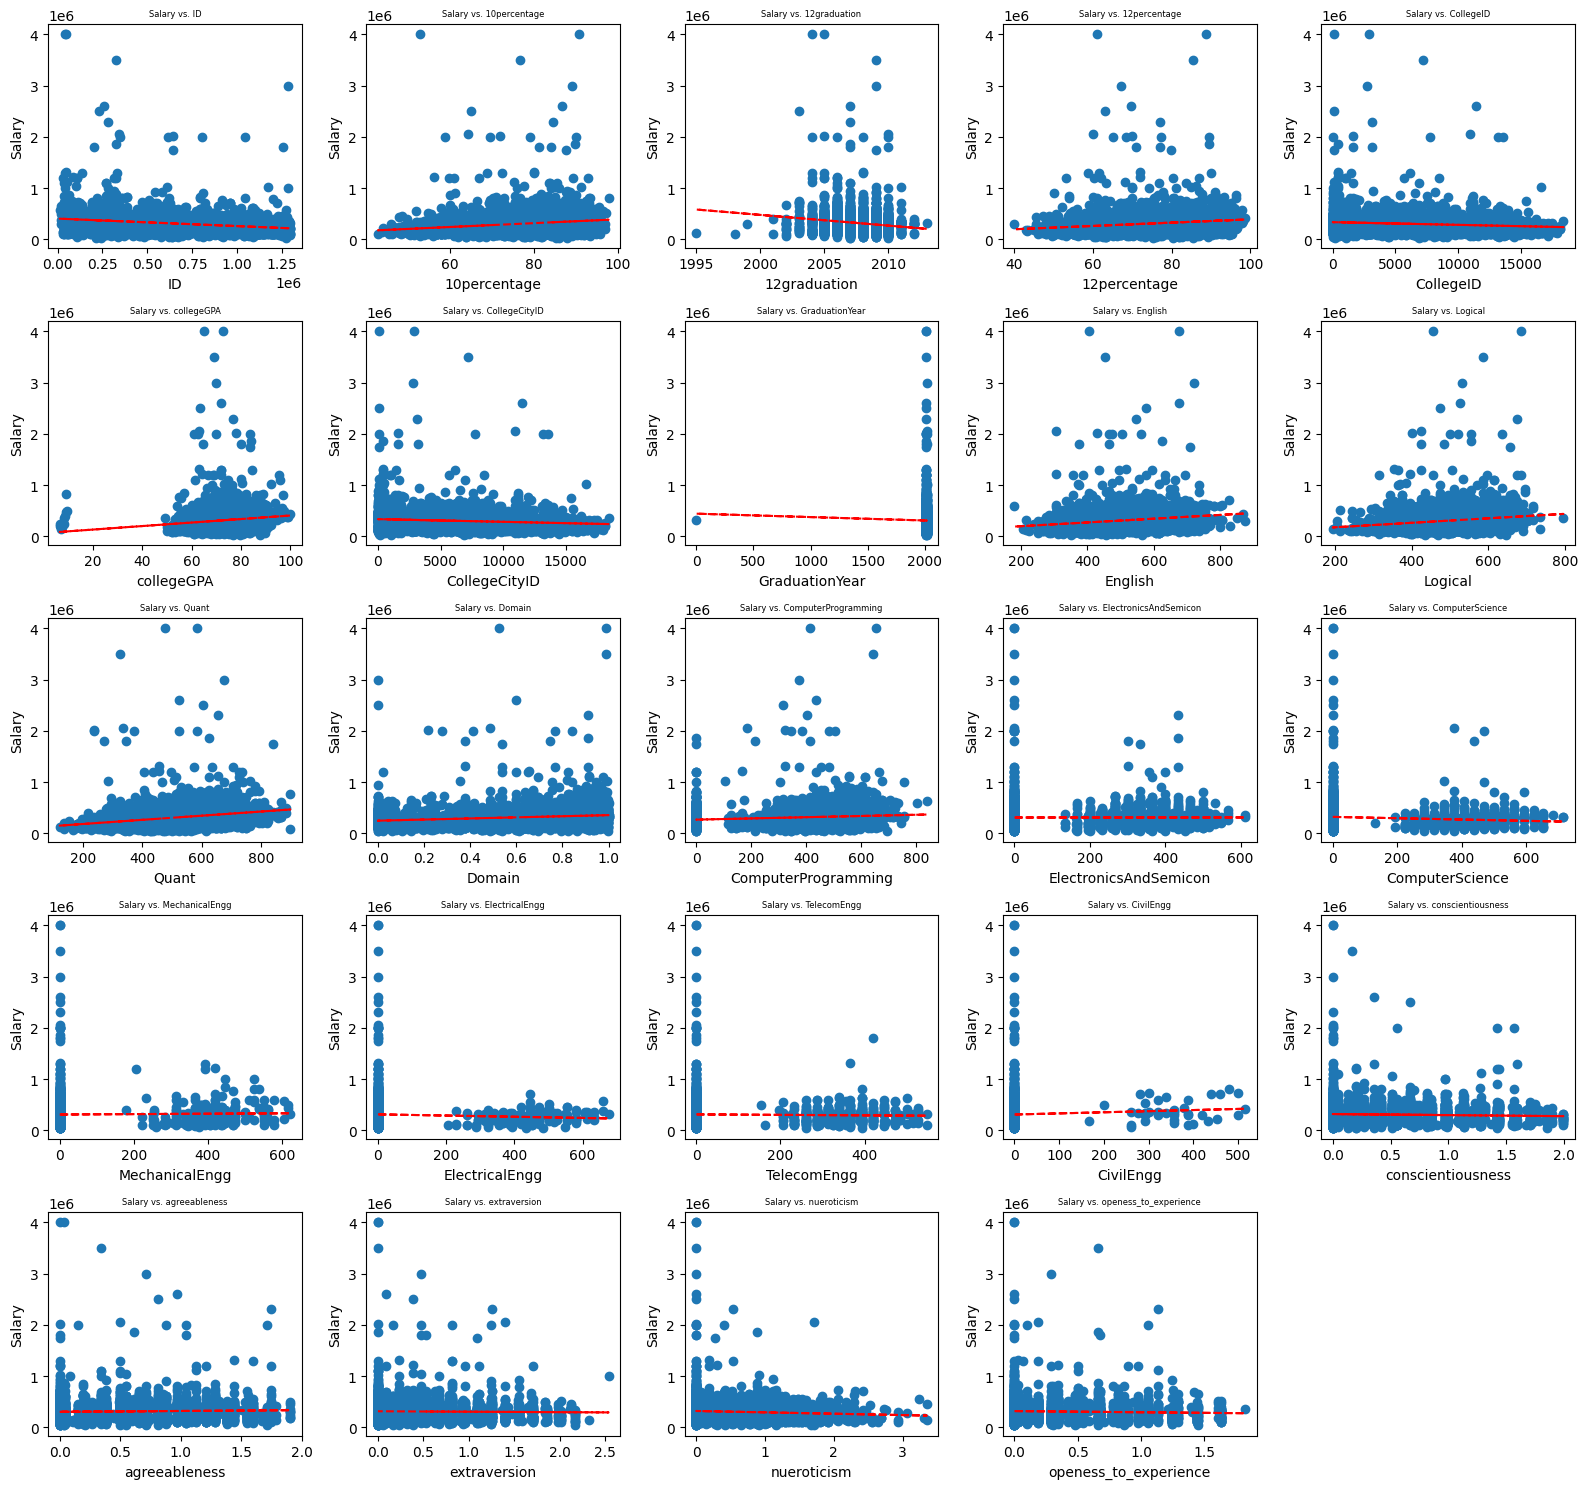

In [67]:
num_cols = df.select_dtypes(include=['number']).columns
cols_to_plot = [col for col in num_cols if col not in cat_df and col != 'Salary']

rows = 5
fig, axes = plt.subplots(rows, 5, figsize=(16, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    plt.sca(axes[i])
    tmp_x = df[col]
    tmp_y = df['Salary']
    plt.scatter(tmp_x, tmp_y)
    plt.xlabel(col)
    plt.ylabel('Salary')
    plt.title(f'Salary vs. {col}', fontsize=6)
    # plot best fit line
    z = np.polyfit(tmp_x, tmp_y, 1)
    p = np.poly1d(z)
    plt.plot(tmp_x, p(tmp_x), "r--")

for i in range(len(cols_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

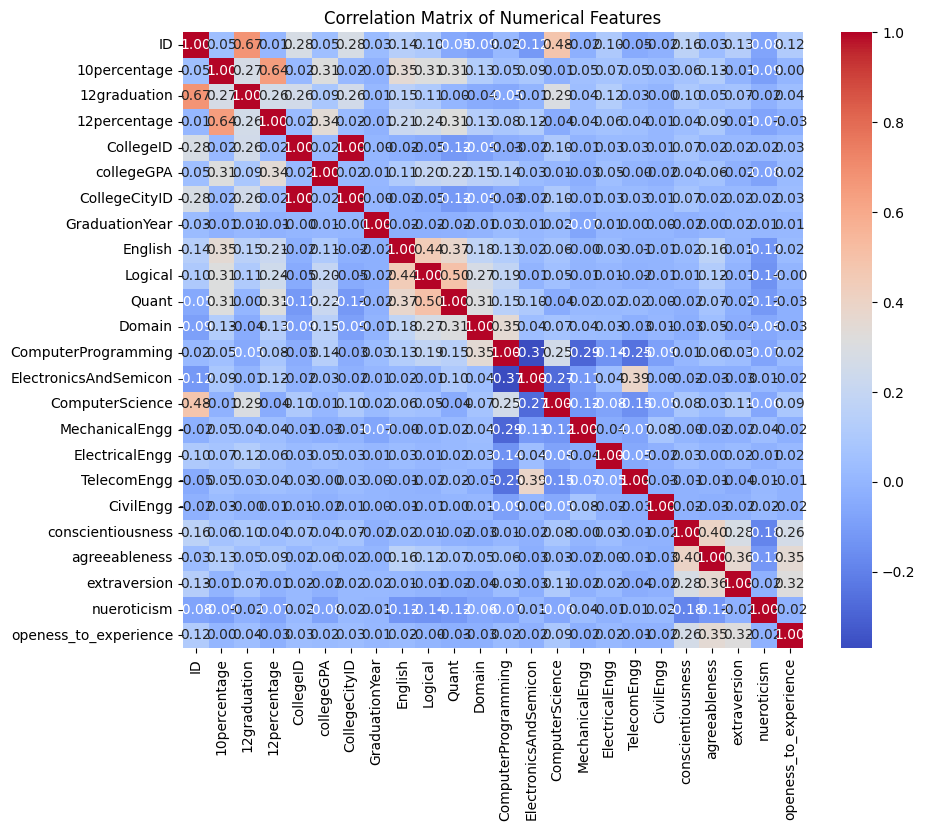

In [68]:
correlation_matrix = df[cols_to_plot].corr()

# heatmp
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Categorical  v/s 'Salary'

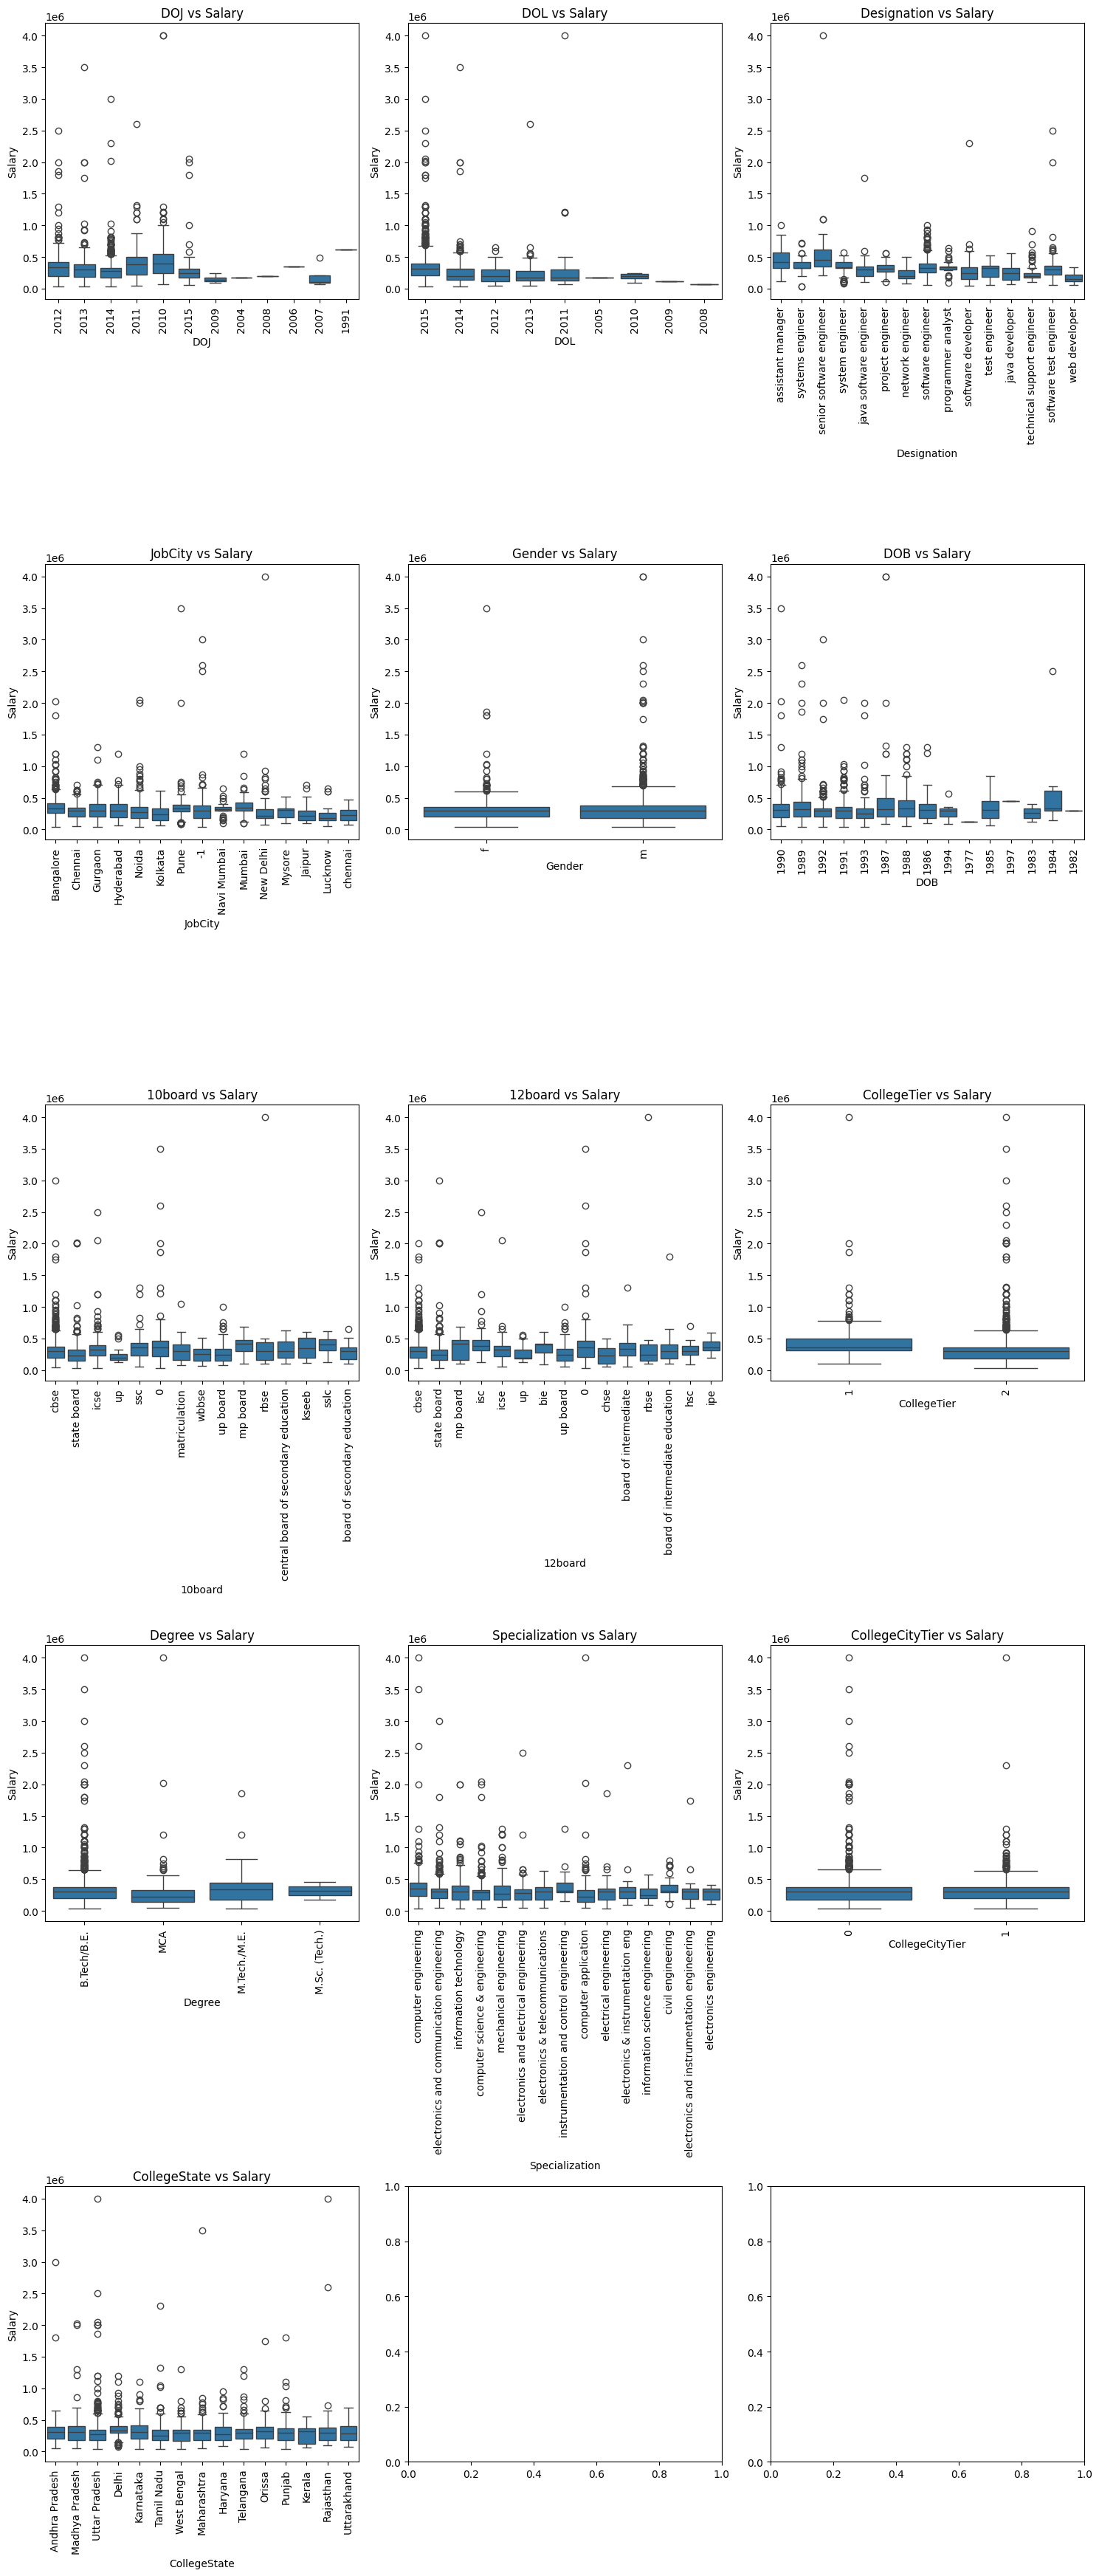

In [81]:
field = ['DOJ', 'DOL', 'DOB']
tempdf =df.copy()

for column in field:
    tempdf[column] = tempdf[column].apply(lambda x : x if (str(x)=='present') else str(pd.to_datetime(x).year))

categorical_cols = tempdf.select_dtypes(include=['object']).columns
num_plots = len(categorical_cols)

rows = (num_plots + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 3, figsize=(15, 7 * rows))

axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(categorical_cols):
  top_8_values = tempdf[col].value_counts().nlargest(15).index
  filtered_df = tempdf[tempdf[col].isin(top_8_values)]

  sns.boxplot(x=col, y='Salary', data=filtered_df, ax=axes[i])
  axes[i].set_title(f'{col} vs Salary')
  axes[i].tick_params(axis='x', rotation=90)
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Salary')

plt.tight_layout()
plt.show()

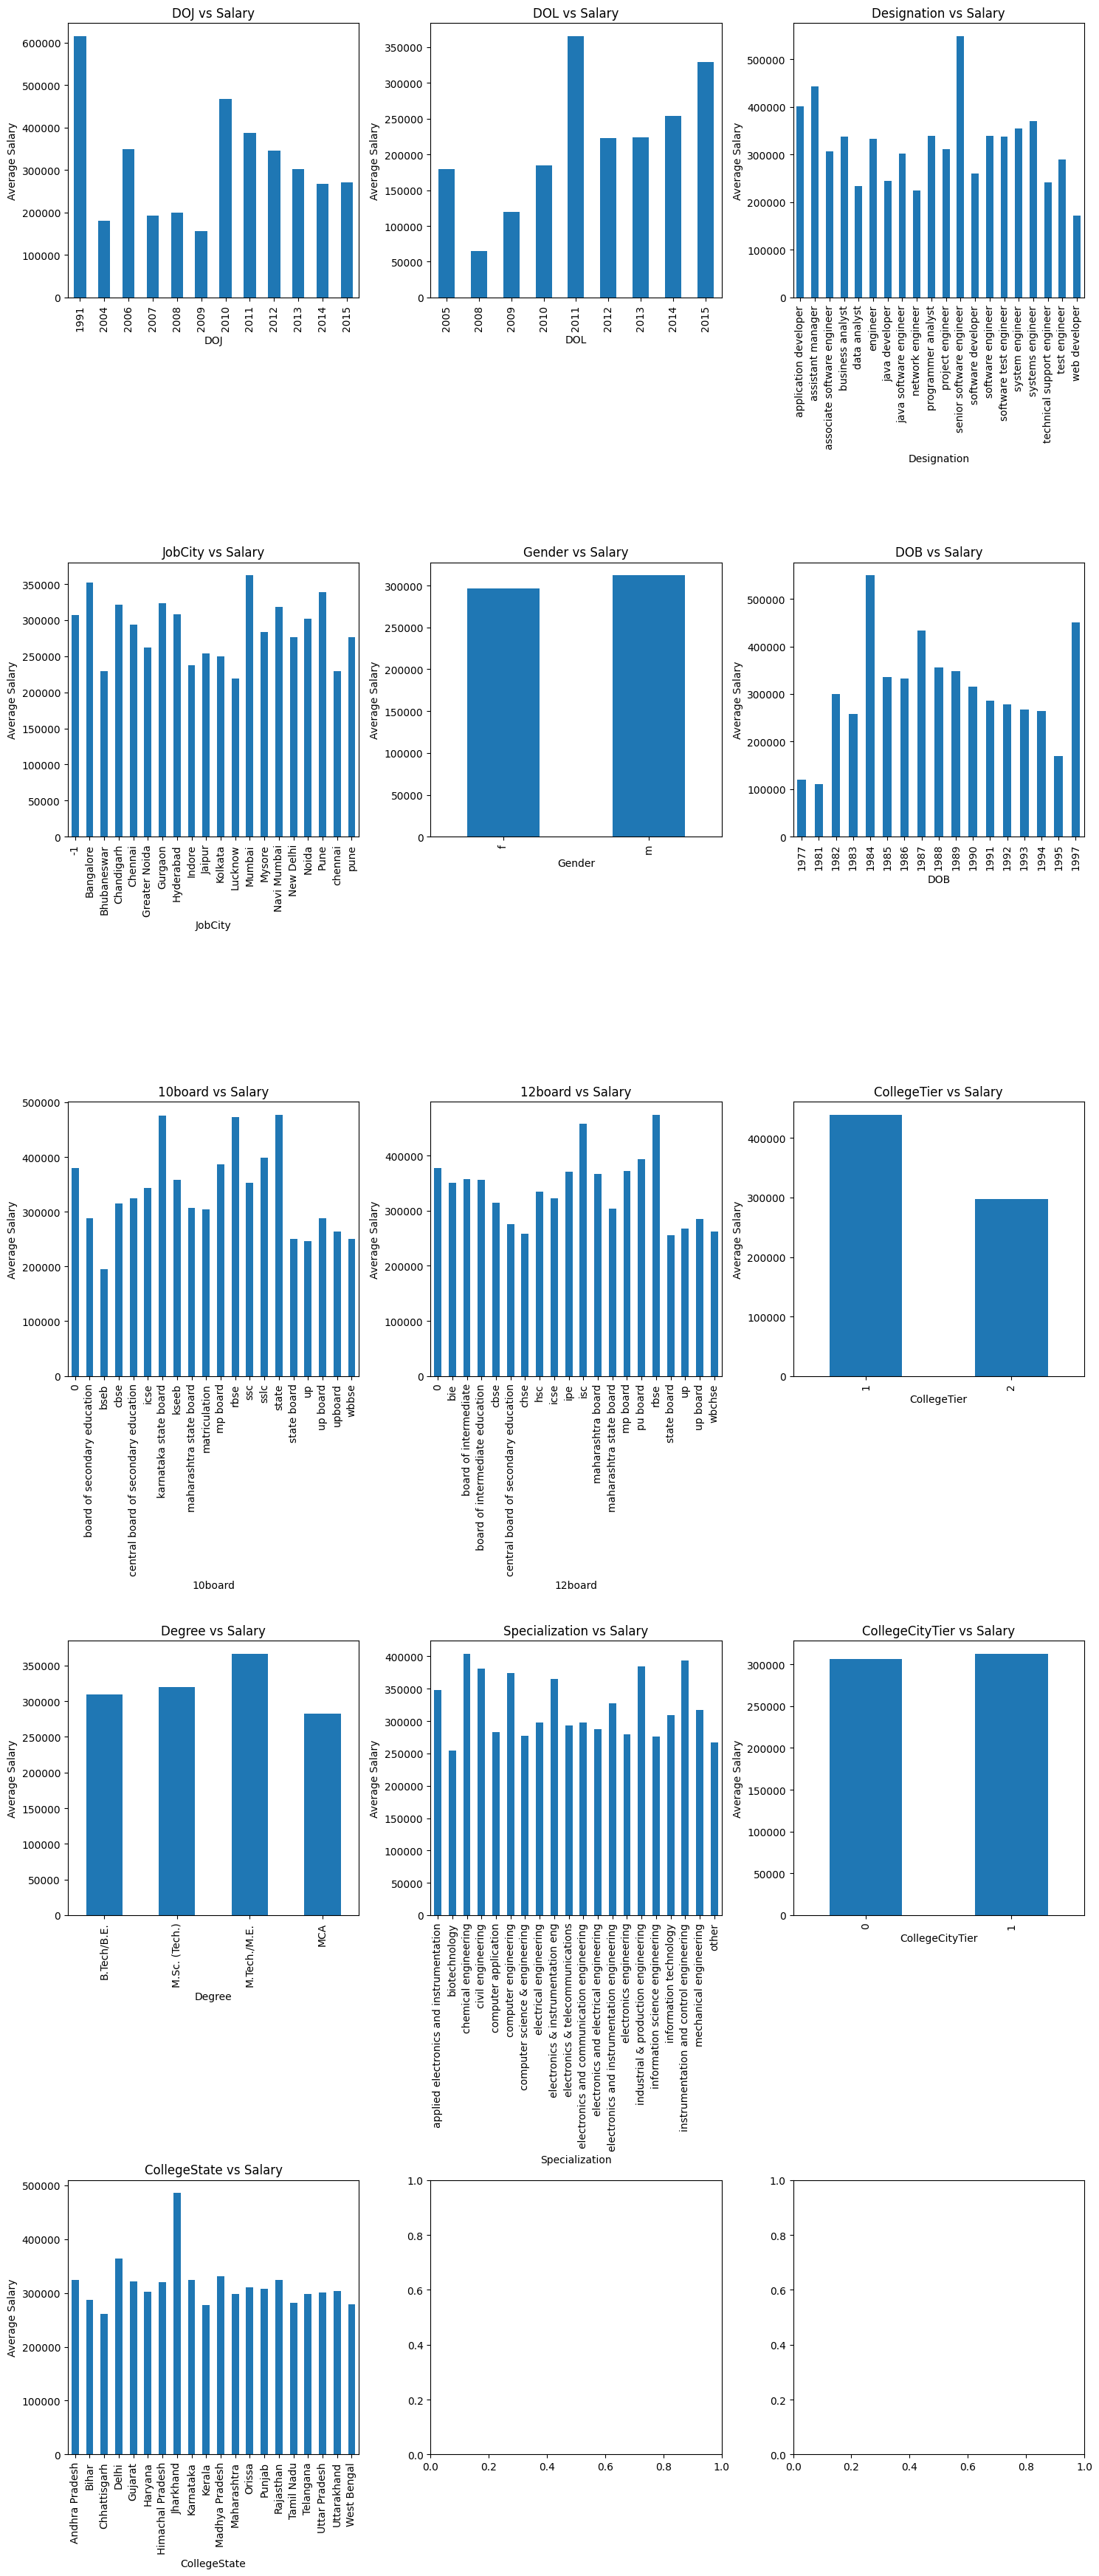

In [78]:
tempdf = df.copy()

for column in field:
    tempdf[column] = tempdf[column].apply(lambda x : x if (str(x)=='present') else str(pd.to_datetime(x).year))

categorical_cols = tempdf.select_dtypes(include=['object']).columns
num_plots = len(categorical_cols)

rows = (num_plots + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(rows, 3, figsize=(15, 7 * rows))

axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(categorical_cols):
  top_20_values = tempdf[col].value_counts().nlargest(20).index
  filtered_df = tempdf[tempdf[col].isin(top_20_values)]

  # Generate bar plot instead of boxplot
  filtered_df.groupby(col)['Salary'].mean().plot(kind='bar', ax=axes[i])

  axes[i].set_title(f'{col} vs Salary')
  axes[i].tick_params(axis='x', rotation=90)
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Average Salary')

plt.tight_layout()
plt.show()

# 3. **Research** Questions

Q1 Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

In [72]:
studydf = df[df['Specialization'].str.contains('computer')]

studydf

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.3549,0.0000
3,267447,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,...,0,0,0,0,0,0.0464,0.3448,0.0000,0.0000,0.0000
6,947847,300000,2014-08-01,2015-05-01,java software engineer,Banglore,m,1993-02-01,86.08,state board,...,346,0,0,0,0,1.7081,0.0000,0.0000,0.0000,0.0000
10,87291,600000,2011-04-01,2015-04-01,senior php developer,Bangalore,m,1989-06-24,88.60,mp board bhopal,...,0,0,0,0,0,0.0464,0.8128,0.0914,0.1798,0.0284
17,874596,250000,2013-08-01,2014-09-01,associate software developer,Gurgaon,m,1987-09-28,60.80,cbse,...,500,0,0,0,0,0.8463,1.0449,0.0000,0.0000,0.6721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3985,358393,430000,2013-03-01,2015-12-31,system engineer,Gurgaon,f,1990-05-14,90.40,cbse,...,0,0,0,0,0,0.2782,0.3448,0.0914,0.0000,0.0000
3986,51897,225000,2010-01-01,2010-10-01,software test engineer,Bangalore,f,1986-02-28,84.93,maharashtra state board,...,0,0,0,0,0,0.0000,1.1248,1.9782,0.0000,0.0000
3989,1204604,300000,2014-09-01,2015-12-31,software engineer,Bangalore,m,1991-11-23,74.88,state board,...,346,0,0,0,0,0.1282,0.0459,1.2396,1.0333,0.6721
3995,355888,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",...,0,0,0,0,0,0.0000,0.0000,0.0000,0.0000,0.0000


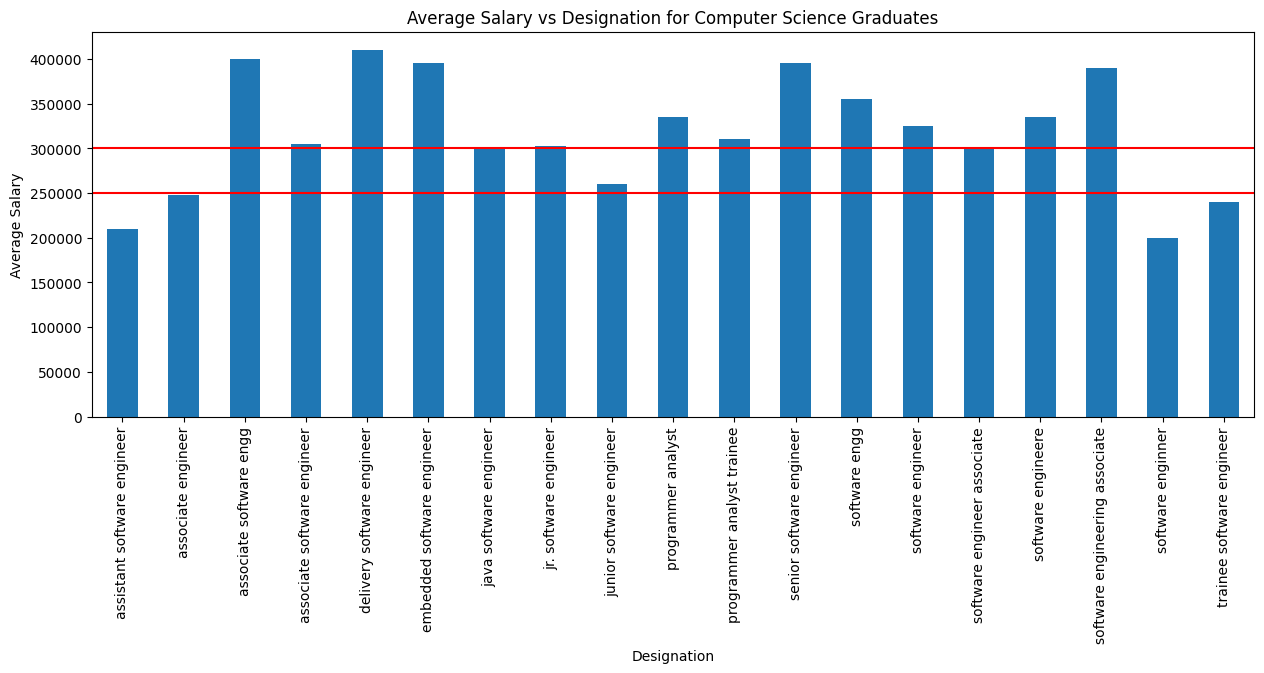

In [73]:
studydf = studydf[
    (studydf['Designation'].str.lower().str.contains('software eng')) |
    (studydf['Designation'].str.lower().str.contains('programmer analyst')) |
    (studydf['Designation'].str.lower().str.contains('hardware eng')) |
    (studydf['Designation'].str.lower().str.contains('associate eng'))
]

q1 = studydf['Salary'].quantile(0.25)
q3 = studydf['Salary'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

cleanstudydf = studydf[(studydf['Salary'] >= lower_bound) & (studydf['Salary'] <= upper_bound)]

plt.figure(figsize=(15, 5))
cleanstudydf.groupby('Designation')['Salary'].median().plot(kind='bar')
plt.title('Average Salary vs Designation for Computer Science Graduates')
plt.xlabel('Designation')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
# draw a line parallel to x axis with y=0.2
plt.axhline(y=0.25*1e6, color='r', linestyle='-')
plt.axhline(y=0.3*1e6, color='r', linestyle='-')
plt.show()

Judging by the bar graph, there is some truth to the claim. Positions for which the claim is not valid are Assistant Software Engineer, Associate Engineer and Software Engineer Trainee.

# 2 . Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [ ]:
specialization_gender_counts = df.groupby(['Specialization', 'Gender'])['Gender'].count().unstack()
specialization_gender_counts['m_f_ratio'] = specialization_gender_counts['m'] / specialization_gender_counts['f']
specialization_gender_counts = specialization_gender_counts[specialization_gender_counts['m'] <= specialization_gender_counts['f']]
print(specialization_gender_counts)

- Biotechnology has more females than males